In [1]:
import tensorflow as tf
from tensorflow import keras

fashion_mnist=keras.datasets.fashion_mnist
(x_train_full,y_train_full),(x_test,y_test)=fashion_mnist.load_data()
x_train_full.shape



(60000, 28, 28)

In [2]:
x_train_full.dtype

dtype('uint8')

In [3]:
x_valid,x_train=x_train_full[:5000]/255.0,x_train_full[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]


In [4]:
class_names=["T-shirt/top","Trouser","Pullover","Drees","Coat",
             "Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_names[y_train[2]]



'Coat'

In [5]:
model=keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [7]:
history=model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))



Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: nan - accuracy: 0.0987 - val_loss: nan - val_accuracy: 0.0958

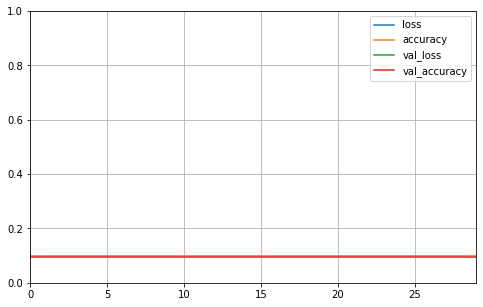

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()



In [11]:
model.save("model.h5")
